In [ ]:
import torch
import torch.optim as optim

In [ ]:
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[1], [2], [3]])

W = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

optimizer = optim.SGD([W, b], lr = 0.01)


nb_epochs = 50

for epoch in range(1, nb_epochs + 1):

  hypothesis = W * x_train + b

  cost = torch.mean((hypothesis - y_train) ** 2)


  optimizer.zero_grad()
  cost.backward()
  optimizer.step()


**Multivarable Linear Regression**

In [ ]:
x_train = torch.FloatTensor([[73, 80, 75], [93, 88, 93], [89, 91, 90], [96, 98, 100], [73, 66, 70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

W = torch.zeros((3, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

optimizer = optim.SGD([W, b], lr=1e-5)

In [ ]:
nb_epochs = 20

for epoch in range(nb_epochs + 1):

  hypothesis = x_train.matmul(W) + b

  cost = torch.mean((hypothesis - y_train)**2)

  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  print('Epoch {:4d}/{} hypothesis: {} cost: {:.6f}'.format(epoch, nb_epochs, hypothesis.squeeze().detach(), cost.item()))

Epoch    0/20 hypothesis: tensor([0., 0., 0., 0., 0.]) cost: 29661.800781
Epoch    1/20 hypothesis: tensor([67.2578, 80.8397, 79.6523, 86.7394, 61.6605]) cost: 9298.520508
Epoch    2/20 hypothesis: tensor([104.9128, 126.0990, 124.2466, 135.3015,  96.1821]) cost: 2915.712402
Epoch    3/20 hypothesis: tensor([125.9942, 151.4381, 149.2133, 162.4896, 115.5097]) cost: 915.040527
Epoch    4/20 hypothesis: tensor([137.7967, 165.6247, 163.1911, 177.7112, 126.3307]) cost: 287.936096
Epoch    5/20 hypothesis: tensor([144.4044, 173.5674, 171.0168, 186.2332, 132.3891]) cost: 91.371063
Epoch    6/20 hypothesis: tensor([148.1035, 178.0143, 175.3980, 191.0042, 135.7812]) cost: 29.758249
Epoch    7/20 hypothesis: tensor([150.1744, 180.5042, 177.8509, 193.6753, 137.6805]) cost: 10.445267
Epoch    8/20 hypothesis: tensor([151.3336, 181.8983, 179.2240, 195.1707, 138.7440]) cost: 4.391237
Epoch    9/20 hypothesis: tensor([151.9824, 182.6789, 179.9928, 196.0079, 139.3396]) cost: 2.493121
Epoch   10/20 hypo

**모듈 사용**

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class MultivariateLinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(3, 1)
  
  def forward(self, x):
    return self.linear(x)


In [ ]:
x_train = torch.FloatTensor([[73, 80, 75], [93, 88, 93], [89, 91, 90], [96, 98, 100], [73, 66, 70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

model = MultivariateLinearRegressionModel()

optimizer = optim.SGD(model.parameters(), lr=1e-5)

nb_epochs = 20

for epoch in range(nb_epochs + 1):

  #hypothesis = x_train.matmul(W) + b
  hypothesis = model(x_train)

  #cost = torch.mean((hypothesis - y_train)**2)
  cost = F.mse_loss(hypothesis, y_train)

  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  print('Epoch {:4d}/{} hypothesis: {} cost: {:.6f}'.format(epoch, nb_epochs, hypothesis.squeeze().detach(), cost.item()))

Epoch    0/20 hypothesis: tensor([-64.2568, -77.3813, -76.1643, -82.3283, -59.6851]) cost: 59874.929688
Epoch    1/20 hypothesis: tensor([31.3016, 37.4738, 37.0039, 40.9090, 27.9207]) cost: 18769.457031
Epoch    2/20 hypothesis: tensor([ 84.8010, 101.7771, 100.3625, 109.9050,  76.9681]) cost: 5885.075684
Epoch    3/20 hypothesis: tensor([114.7531, 137.7783, 135.8346, 148.5332, 104.4282]) cost: 1846.505859
Epoch    4/20 hypothesis: tensor([131.5220, 157.9342, 155.6941, 170.1597, 119.8023]) cost: 580.627747
Epoch    5/20 hypothesis: tensor([140.9100, 169.2189, 166.8126, 182.2675, 128.4100]) cost: 183.841003
Epoch    6/20 hypothesis: tensor([146.1658, 175.5370, 173.0374, 189.0462, 133.2293]) cost: 59.468678
Epoch    7/20 hypothesis: tensor([149.1081, 179.0744, 176.5224, 192.8412, 135.9277]) cost: 20.484039
Epoch    8/20 hypothesis: tensor([150.7552, 181.0551, 178.4734, 194.9659, 137.4386]) cost: 8.263675
Epoch    9/20 hypothesis: tensor([151.6770, 182.1641, 179.5656, 196.1553, 138.2848]) 

**Minibatch 그래디언트**

In [ ]:
from torch.utils.data import Dataset

class CustomDataset(Dataset):
  def __init__(self):
    self.x_data = [[73, 80, 75], [93, 88, 93], [89, 91, 90], [96, 98, 100], [73, 66, 70]]
    self.y_data = [[152], [185], [180], [196], [142]]

  def __len__(self):
    return len(self.x_data)

  def __getitem__(self, idx):
    x = torch.FloatTensor(self.x_data[idx])
    y = torch.FloatTensor(self.y_data[idx])

    return x, y

dataset = CustomDataset()

In [ ]:
from torch.utils.data import DataLoader
dataloader = DataLoader(
    dataset,
    batch_size = 2,
    shuffle = True
)

In [ ]:
nb_epochs = 20

for epoch in range(nb_epochs + 1):

  for batch_idx, samples in enumerate(dataloader):
    x_train, y_train = samples
    #hypothesis = x_train.matmul(W) + b
    hypothesis = model(x_train)

    #cost = torch.mean((hypothesis - y_train)**2)
    cost = F.mse_loss(hypothesis, y_train)

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    print('Epoch {:4d}/{} Batch: {}/{} cost: {:.6f}'.format(epoch, nb_epochs, batch_idx + 1, len(dataloader), cost.item()))

Epoch    0/20 Batch: 1/3 cost: 1.367168
Epoch    0/20 Batch: 2/3 cost: 4.843562
Epoch    0/20 Batch: 3/3 cost: 1.225775
Epoch    1/20 Batch: 1/3 cost: 2.416980
Epoch    1/20 Batch: 2/3 cost: 4.264597
Epoch    1/20 Batch: 3/3 cost: 0.857014
Epoch    2/20 Batch: 1/3 cost: 0.408603
Epoch    2/20 Batch: 2/3 cost: 5.260408
Epoch    2/20 Batch: 3/3 cost: 2.855283
Epoch    3/20 Batch: 1/3 cost: 3.755730
Epoch    3/20 Batch: 2/3 cost: 6.007198
Epoch    3/20 Batch: 3/3 cost: 1.804557
Epoch    4/20 Batch: 1/3 cost: 1.857659
Epoch    4/20 Batch: 2/3 cost: 4.812669
Epoch    4/20 Batch: 3/3 cost: 2.289309
Epoch    5/20 Batch: 1/3 cost: 3.209916
Epoch    5/20 Batch: 2/3 cost: 4.591710
Epoch    5/20 Batch: 3/3 cost: 2.998748
Epoch    6/20 Batch: 1/3 cost: 3.373353
Epoch    6/20 Batch: 2/3 cost: 4.318974
Epoch    6/20 Batch: 3/3 cost: 1.809234
Epoch    7/20 Batch: 1/3 cost: 3.525987
Epoch    7/20 Batch: 2/3 cost: 3.988598
Epoch    7/20 Batch: 3/3 cost: 2.703630
Epoch    8/20 Batch: 1/3 cost: 4.991928


**Logistic Regression**

In [ ]:
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]

x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

print(x_train.shape)
print(y_train.shape)

torch.Size([6, 2])
torch.Size([6, 1])


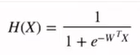

hypothesis 공식

In [ ]:
W = torch.zeros([2, 1], requires_grad=True)
b = torch.zeros([1], requires_grad=True)

#시그모이드 함수에 wx + b를 넣은 형태
#hypothesis = 1/(1 + torch.exp(-(torch.matmul(x_train, W) + b)))
#torch 함수가 제공하는 sigmoid 함수로 변환
hypothesis = torch.sigmoid(torch.matmul(x_train, W) + b)

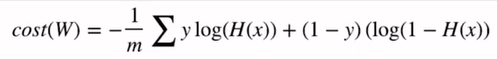

COST 함수 공식

In [ ]:
#평균 구하기 전 안쪽 공식
losses = -(y_train * torch.log(hypothesis) + (1-y_train)*torch.log(1 - hypothesis))

#mean 함수를 이용해 평균을 구해서 cost 구하기
cost = losses.mean()
print(cost)

#이를 한번에 계산하기
cost = F.binary_cross_entropy(hypothesis, y_train)
print(cost)

tensor(0.6931, grad_fn=<MeanBackward0>)
tensor(0.6931, grad_fn=<BinaryCrossEntropyBackward>)


In [ ]:
optimizer = optim.SGD([W, b], lr = 1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):
  #앞에서 계산했던 예측값
  hypothesis = torch.sigmoid(torch.matmul(x_train, W) + b)
  
  #앞에서 계산했던 cost 함수
  cost = F.binary_cross_entropy(hypothesis, y_train)

  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  if(epoch % 100 == 0):
    print('Epoch {:4d}/{} Cost : {:.6f}'.format(epoch, nb_epochs, cost.item()))
  

Epoch    0/1000 Cost : 0.693147
Epoch  100/1000 Cost : 0.134722
Epoch  200/1000 Cost : 0.080643
Epoch  300/1000 Cost : 0.057900
Epoch  400/1000 Cost : 0.045300
Epoch  500/1000 Cost : 0.037261
Epoch  600/1000 Cost : 0.031672
Epoch  700/1000 Cost : 0.027556
Epoch  800/1000 Cost : 0.024394
Epoch  900/1000 Cost : 0.021888
Epoch 1000/1000 Cost : 0.019852


**Logistic 평가**

In [ ]:
#0.5가 넘으면 1로 저장 후 같은 결과 비교
prediction = hypothesis >= torch.FloatTensor([0.5])
correct_prediction = prediction.float() == y_train

**Logistic regression 클래스로 만들기**

In [ ]:
class BinaryClassifier(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(2,1)
    self.sigmoid = nn.Sigmoid()

  def forward(self, x):
    return self.sigmoid(self.linear(x))

In [ ]:
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]

x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

model = BinaryClassifier()

#만든 클래스를 이용해서 예측하기
optimizer = optim.SGD(model.parameters(), lr = 1)

nb_epochs = 100
for epoch in range(nb_epochs + 1):
  
  #model을 이용
  hypothesis = model(x_train)
  
  #앞에서 계산했던 cost 함수
  cost = F.binary_cross_entropy(hypothesis, y_train)

  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  # 10번마다 출력
  if(epoch % 10 == 0):
    prediction = hypothesis >= torch.FloatTensor([0.5])
    correct_prediction = prediction.float() == y_train
    accuracy = correct_prediction.sum().item() / len(correct_prediction)
    print('Epoch {:4d}/{} Cost : {:.6f} Accuracy: {:2.2f}'.format(epoch, nb_epochs, cost.item(), accuracy * 100))

Epoch    0/100 Cost : 0.674921 Accuracy: 50.00
Epoch   10/100 Cost : 0.958626 Accuracy: 66.67
Epoch   20/100 Cost : 0.631134 Accuracy: 83.33
Epoch   30/100 Cost : 0.535473 Accuracy: 83.33
Epoch   40/100 Cost : 0.447843 Accuracy: 83.33
Epoch   50/100 Cost : 0.363934 Accuracy: 83.33
Epoch   60/100 Cost : 0.285129 Accuracy: 83.33
Epoch   70/100 Cost : 0.217536 Accuracy: 83.33
Epoch   80/100 Cost : 0.172270 Accuracy: 100.00
Epoch   90/100 Cost : 0.151261 Accuracy: 100.00
Epoch  100/100 Cost : 0.139982 Accuracy: 100.00
